<font color=red><p style="font-size:32px;text-align:center"><b>Spam Emails Classification</b></p></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("D:/Case Studies/Spam Mails/spam_mails.csv")

In [2]:
print("Number of Datapoints :",data.shape[0])
print("Number of Features/Columns :",data.shape[1])
print("Features: ",data.columns)

Number of Datapoints : 5171
Number of Features/Columns : 4
Features:  Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [3]:
data.head(6)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


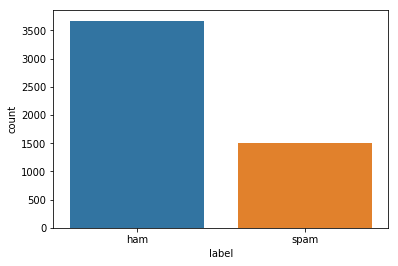

In [5]:
import seaborn as sns
sns.countplot(x="label", data=data)

In [6]:
data['text'][1]

'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'

**<font color=blue>Data Preprocessing</font>**

In [7]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [8]:
#data_text_processing_stage_
for index, row in data.iterrows():
    if type(row['text']) is str:
        txt_preprocessing(row['text'], index, 'text', data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter 988291 follow not...,0
1,2349,ham,subject hpl nom january 9 2001 see attached fi...,0
2,3624,ham,subject neon retreat ho ho ho around wonderful...,0
3,4685,spam,subject photoshop windows office cheap main tr...,1
4,2030,ham,subject indian springs deal book teco pvr reve...,0


In [9]:
data['text'][3]

'subject photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin '

In [10]:
preprocessed_data = pd.DataFrame({'text':data['text'], 'Spam/Ham':data['label_num']})
preprocessed_data.head()

,text,Spam/Ham
0,subject enron methanol meter 988291 follow not...,0
1,subject hpl nom january 9 2001 see attached fi...,0
2,subject neon retreat ho ho ho around wonderful...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian springs deal book teco pvr reve...,0


**<font color=blue>Train-Test Split</font>**

In [11]:
#split_your_data
from sklearn.model_selection import train_test_split
X = preprocessed_data['text']
Y = preprocessed_data['Spam/Ham']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [12]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 3308
NUMBER OF DATA POINTS IN TEST DATA : 1035
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 828


**<font color=blue>TFIDF of Text Data</font>**

In [13]:
#perform_tfidf_vectorization_of_text_data
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=5000)
text_vec.fit(X_train.values)

train_text = text_vec.transform(X_train.values)
test_text = text_vec.transform(X_test.values)
cv_text = text_vec.transform(X_cv.values)

print(train_text.shape)
print(test_text.shape)
print(cv_text.shape)

(3308, 3483)
(1035, 3483)
(828, 3483)


**<font color=blue>Confusion Matrix</font>**

In [14]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
    
    labels = [0,1]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(8,6))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(8,6))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(8,6))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

**<h2><font color=red>1.</font><font color=green> Logistic Regression</font></h2>**

For values of alpha = 1e-05 The log loss is: 0.03860476141257347
For values of alpha = 0.0001 The log loss is: 0.042023819048172685
For values of alpha = 0.001 The log loss is: 0.07428520582700611
For values of alpha = 0.01 The log loss is: 0.1154252890514452
For values of alpha = 0.1 The log loss is: 0.12624959808603128
For values of alpha = 1 The log loss is: 0.13770194933302227


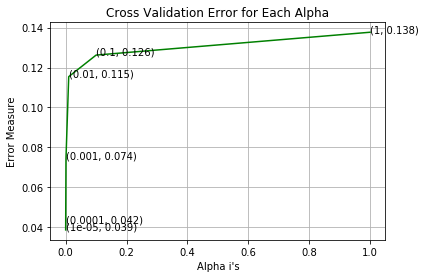

For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.014234110164733256
For Values of Best Alpha = 1e-05 The Test Log Loss is: 0.051744324215029676
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.03860476141257347


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

#train a logistic regression + calibration model using text features which are one-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42) #loss='log'_means_logistic_regression
    clf.fit(train_text, y_train)
    
    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)
    
    predict_y = lr_sig_clf.predict_proba(cv_text)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For values of alpha =',i,"The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text, y_train)

predict_y = lr_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(test_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Test Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

---------------------------------------- Confusion Matrix ----------------------------------------


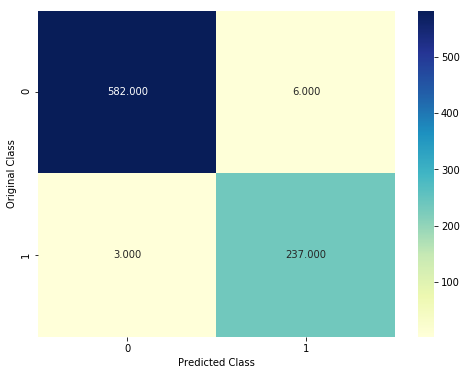

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


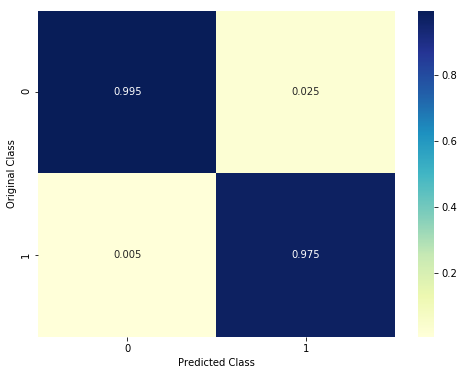

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


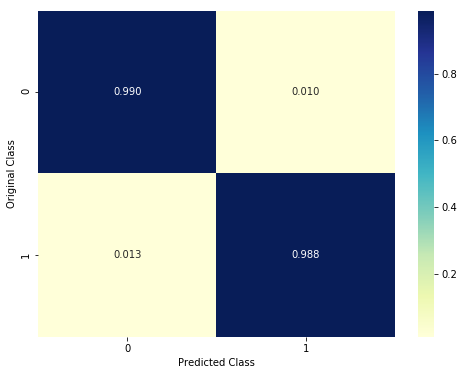

In [16]:
plot_confusion_matrix(y_cv, lr_sig_clf.predict(cv_text.toarray()))

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, lr_sig_clf.predict(cv_text)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       588
           1       0.98      0.99      0.98       240

    accuracy                           0.99       828
   macro avg       0.99      0.99      0.99       828
weighted avg       0.99      0.99      0.99       828



In [18]:
from sklearn.metrics import accuracy_score
lr_test_accuracy = (lr_sig_clf.score(test_text, y_test)*100)
print("Logistic Regression Test Accuracy -",lr_test_accuracy)

Logistic Regression Test Accuracy - 98.26086956521739


**<h2><font color=red>2.</font><font color=green> Multinomial Naive Bayes</font></h2>**

For Alpha = 1e-05
Log Loss : 0.10055204074700469
For Alpha = 0.0001
Log Loss : 0.10439368377236463
For Alpha = 0.001
Log Loss : 0.10921398614097155
For Alpha = 0.1
Log Loss : 0.12216297106597981
For Alpha = 1
Log Loss : 0.13581107699701417
For Alpha = 10
Log Loss : 0.12427449367978069
For Alpha = 100
Log Loss : 0.12797606003618817
For Alpha = 1000
Log Loss : 0.13591006642709644


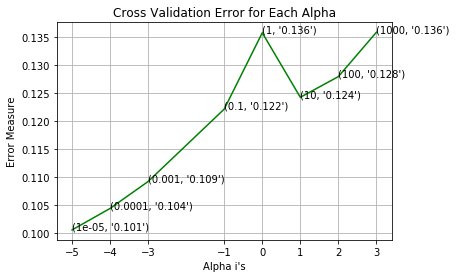

For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.07556635533397192
For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.08880927389913543
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.10055204074700469


In [19]:
from sklearn.naive_bayes import MultinomialNB

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]

cv_log_error_array = []

for i in alpha:
    print("For Alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_text, y_train)
    
    nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    nb_sig_clf.fit(train_text, y_train)
    
    sig_clf_probs = nb_sig_clf.predict_proba(cv_text)
    
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')

for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
    
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_text, y_train)

nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
nb_sig_clf.fit(train_text, y_train)

predict_y = nb_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = nb_sig_clf.predict_proba(test_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = nb_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha], "The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

---------------------------------------- Confusion Matrix ----------------------------------------


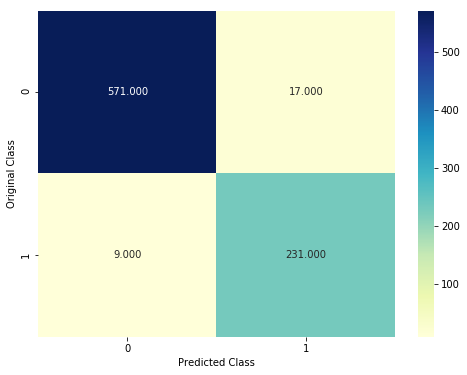

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


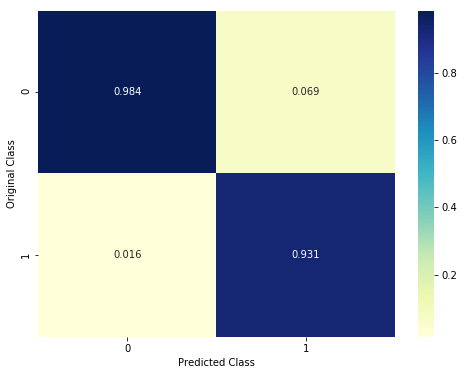

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


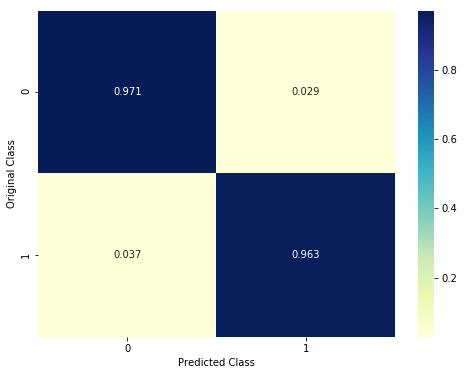

In [20]:
plot_confusion_matrix(y_cv, nb_sig_clf.predict(cv_text.toarray()))

In [21]:
print(classification_report(y_cv, nb_sig_clf.predict(cv_text)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       588
           1       0.93      0.96      0.95       240

    accuracy                           0.97       828
   macro avg       0.96      0.97      0.96       828
weighted avg       0.97      0.97      0.97       828



In [22]:
nb_test_accuracy = (nb_sig_clf.score(test_text, y_test)*100)
print("Naive Bayes Test Accuracy -",nb_test_accuracy)

Naive Bayes Test Accuracy - 97.0048309178744


**<h2><font color=red>3.</font><font color=green> K Nearest Neighbor</font></h2>**

for alpha = 5
Log Loss : 0.07272563507714827
for alpha = 11
Log Loss : 0.05243523170538305
for alpha = 15
Log Loss : 0.05846905171908096
for alpha = 21
Log Loss : 0.06832206162935614
for alpha = 31
Log Loss : 0.07750588320800168
for alpha = 41
Log Loss : 0.08435067633962962
for alpha = 51
Log Loss : 0.09175565703263089
for alpha = 99
Log Loss : 0.11596689033949849


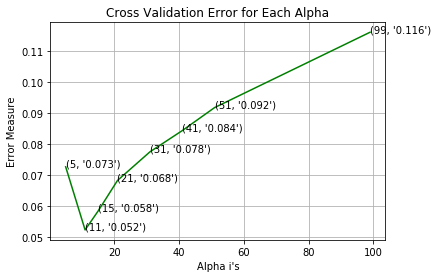

For Values of Best Alpha = 11 The Train Log Loss is: 0.06419172589514176
For Values of Best Alpha = 11 The Test Log Loss is: 0.07634048258851134
For Values of Best Alpha = 11 The Cross Validation Log Loss is: 0.05243523170538305


In [23]:
from sklearn.neighbors import KNeighborsClassifier

alpha = [5, 11, 15, 21, 31, 41, 51, 99]

cv_log_error_array = []

for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i) 
    clf.fit(train_text, y_train) #knn may not good at handling large dimensionality
    
    knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    knn_sig_clf.fit(train_text, y_train)
    
    sig_clf_probs = knn_sig_clf.predict_proba(cv_text)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_text, y_train)

knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
knn_sig_clf.fit(train_text, y_train)

predict_y = knn_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha], "The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = knn_sig_clf.predict_proba(test_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Test Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = knn_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha], "The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

---------------------------------------- Confusion Matrix ----------------------------------------


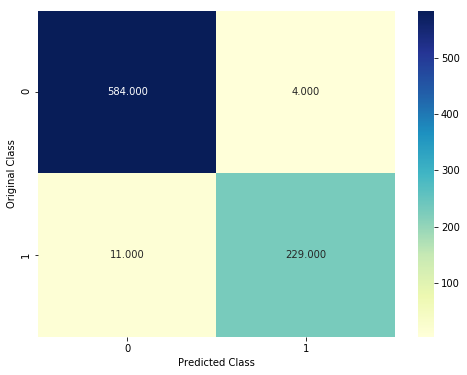

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


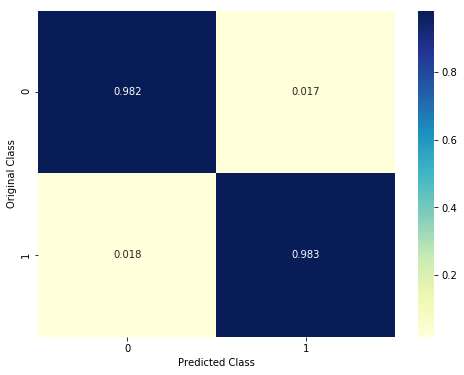

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


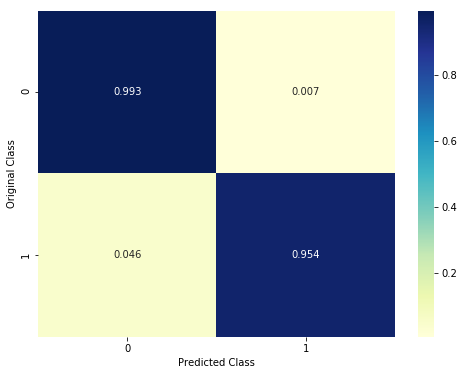

In [24]:
plot_confusion_matrix(y_cv, knn_sig_clf.predict(cv_text.toarray()))

In [25]:
print(classification_report(y_cv, knn_sig_clf.predict(cv_text)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       588
           1       0.98      0.95      0.97       240

    accuracy                           0.98       828
   macro avg       0.98      0.97      0.98       828
weighted avg       0.98      0.98      0.98       828



In [26]:
knn_test_accuracy = (knn_sig_clf.score(test_text, y_test)*100)
print("K Nearest Neighbors Test Accuracy -",knn_test_accuracy)

K Nearest Neighbors Test Accuracy - 96.71497584541063


**<font color=red>Pretty Table</font>**

In [27]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Test Accuracy Score"]
x.add_row(['Logistic Regression', round(lr_test_accuracy, 2)])
x.add_row(['Multinomial Naive Bayes', round(nb_test_accuracy, 2)])
x.add_row(['K Nearest Neighbor', round(knn_test_accuracy, 2)])
print(x)

+-------------------------+---------------------+
|          Model          | Test Accuracy Score |
+-------------------------+---------------------+
|   Logistic Regression   |        98.26        |
| Multinomial Naive Bayes |         97.0        |
|    K Nearest Neighbor   |        96.71        |
+-------------------------+---------------------+
